In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from datetime import datetime

from vega_datasets import data

# 1
> data.sf_temps()

1. Resample by the day and take the average temperature. Visualize the average temperature over time.


In [2]:
# look at the data
df = data.sf_temps()
df

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


In [3]:
# set date as index
df = df.set_index('date')
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [4]:
#sort index
df = df.sort_index()
df

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-12-31 19:00:00,50.4
2010-12-31 20:00:00,49.9
2010-12-31 21:00:00,49.4


In [5]:
#get the daily avg temp mean
df_daily = df.resample('D').mean()
df_daily.head()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667


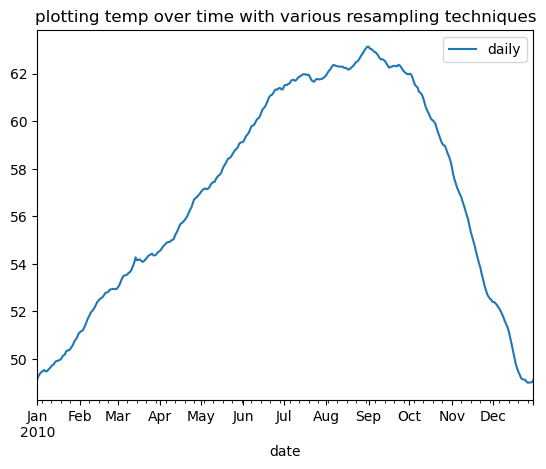

In [6]:


df_daily.temp.plot(label='daily')


plt.title('plotting temp over time with various resampling techniques')
plt.legend()
plt.show()

2. Write the code necessary to visualize the minimum temperature over time.



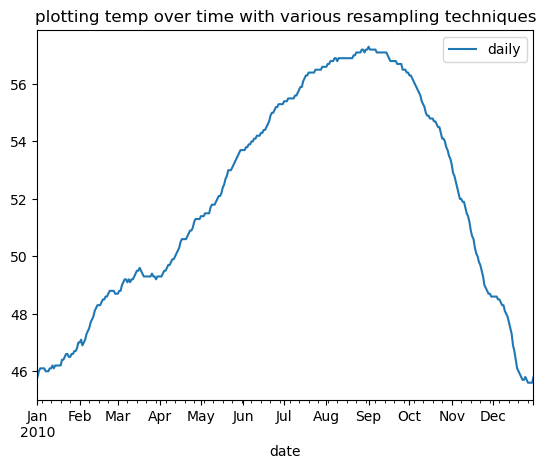

In [7]:


df.resample('D').min().temp.plot(label='daily')


plt.title('plotting temp over time with various resampling techniques')
plt.legend()
plt.show()


3. Write the code necessary to visualize the maximum temperature over time.



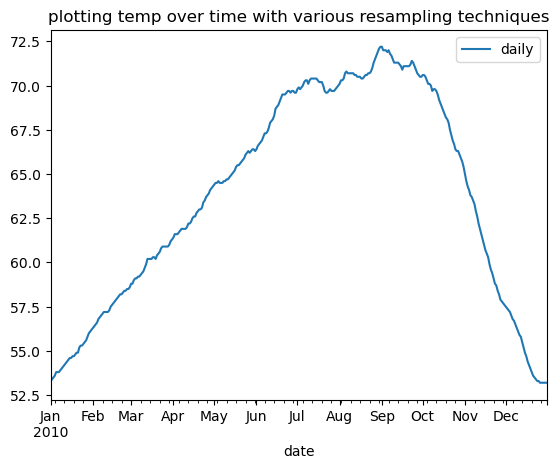

In [8]:


df.resample('D').max().temp.plot(label='daily')

plt.title('plotting temp over time with various resampling techniques')
plt.legend()
plt.show()


4. Which month is the coldest, on average?



In [9]:
df_daily.resample('M').mean().sort_values(by='temp').head(1)

,temp
date,
2010-01-31,49.98414



5. Which month has the highest average temperature?


In [10]:
df_daily.resample('M').mean().sort_values(by='temp', ascending=False).head(1)

,temp
date,
2010-09-30,62.487083



6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?


In [11]:
df_daily2 = df.resample('D').agg(['min','max'])
df_daily2

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8
...          ...   ...
2010-12-27  45.6  53.2
2010-12-28  45.6  53.2
2010-12-29  45.6  53.2
2010-12-30  45.6  53.2
2010-12-31  45.8  53.2

[365 rows x 2 columns]

In [12]:
df_daily2['diff'] = df_daily2.temp['max'] - df_daily2.temp['min']
df_daily2

temp       diff
             min   max     
date                       
2010-01-01  45.8  53.3  7.5
2010-01-02  46.0  53.4  7.4
2010-01-03  46.1  53.5  7.4
2010-01-04  46.1  53.6  7.5
2010-01-05  46.1  53.8  7.7
...          ...   ...  ...
2010-12-27  45.6  53.2  7.6
2010-12-28  45.6  53.2  7.6
2010-12-29  45.6  53.2  7.6
2010-12-30  45.6  53.2  7.6
2010-12-31  45.8  53.2  7.4

[365 rows x 3 columns]

In [13]:
df_daily2['delta'] = df_daily2.apply(lambda row: ((row.temp.max())-(row.temp.min())), axis=1)


In [14]:
df_daily2.sort_values(by='delta', ascending=False).head(1)

temp        diff delta
             min   max            
date                              
2010-08-31  57.2  72.2  15.0  15.0


7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [15]:
df_daily3 = df.resample('D').agg(['mean','min','max'])
df_daily3

temp            
                 mean   min   max
date                             
2010-01-01  49.170833  45.8  53.3
2010-01-02  49.304167  46.0  53.4
2010-01-03  49.391667  46.1  53.5
2010-01-04  49.445833  46.1  53.6
2010-01-05  49.491667  46.1  53.8
...               ...   ...   ...
2010-12-27  48.991667  45.6  53.2
2010-12-28  49.000000  45.6  53.2
2010-12-29  49.012500  45.6  53.2
2010-12-30  49.012500  45.6  53.2
2010-12-31  49.116667  45.8  53.2

[365 rows x 3 columns]

<Figure size 1400x1000 with 0 Axes>

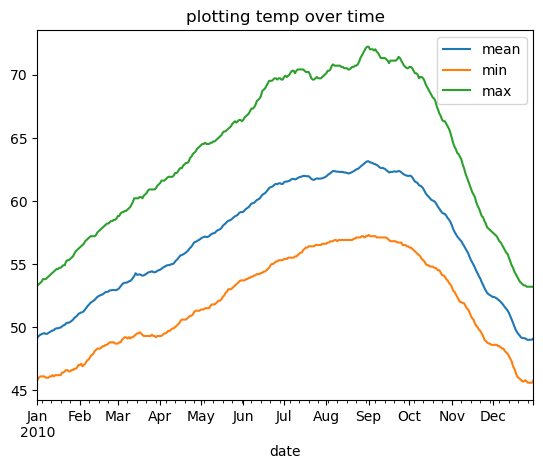

In [16]:
plt.figure(figsize=(14,10))


df.resample('D').agg(['mean','min','max']).temp.plot()

plt.title('plotting temp over time')
plt.legend()
plt.show()



# 2
- data.seattle_weather()

1. Which year and month combination has the highest amount of precipitation?

In [17]:
df1 = data.seattle_weather()
df1

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,fog
1457,2015-12-28,1.5,5.0,1.7,1.3,fog
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [18]:
#check that date is in proper format
df1.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
dtype: object

In [19]:
# set date as index
df1 = df1.set_index('date')
df1.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [20]:
df1.resample('M').sum().sort_values(by='precipitation', ascending=False).head(1)

,precipitation,temp_max,temp_min,wind
date,,,,
2015-12-31,284.5,259.8,118.6,134.6


2. Visualize the amount of monthly precipitation over time.


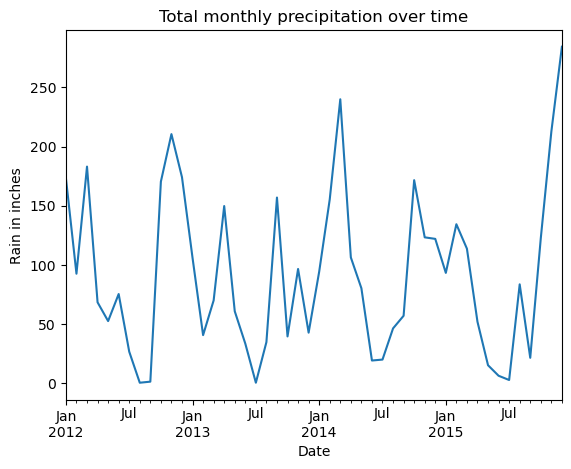

In [21]:
# visualize monthly precipitation over time
df1.resample('M').sum().precipitation.plot()
plt.title('Total monthly precipitation over time')
plt.xlabel('Date')
plt.ylabel('Rain in inches')
plt.show()


3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.


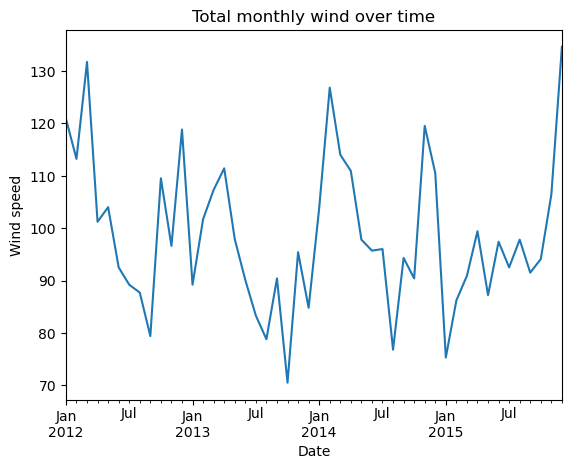

In [22]:
# visualize monthly precipitation over time
df1.resample('M').sum().wind.plot()
plt.title('Total monthly wind over time')
plt.xlabel('Date')
plt.ylabel('Wind speed')
plt.show()

4. Which year-month combination is the windiest?


In [23]:
df1.resample('M').sum().sort_values(by='wind', ascending=False).head(1)

,precipitation,temp_max,temp_min,wind
date,,,,
2015-12-31,284.5,259.8,118.6,134.6


5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [25]:
df1[df1['weather'] == 'sun'].resample('Y').count().weather.idxmax()


Timestamp('2014-12-31 00:00:00', freq='A-DEC')

6. In which month does it rain the most?

In [26]:
df1.resample('M').mean().sort_values(by='precipitation', ascending=False).head(1)

,precipitation,temp_max,temp_min,wind
date,,,,
2015-12-31,9.177419,8.380645,3.825806,4.341935


7. Which month has the most number of days with a non-zero amount of precipitation?

In [27]:
df1.resample('D').sum()

,precipitation,temp_max,temp_min,wind
date,,,,
2012-01-01,0.0,12.8,5.0,4.7
2012-01-02,10.9,10.6,2.8,4.5
2012-01-03,0.8,11.7,7.2,2.3
2012-01-04,20.3,12.2,5.6,4.7
2012-01-05,1.3,8.9,2.8,6.1
...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9
2015-12-28,1.5,5.0,1.7,1.3
2015-12-29,0.0,7.2,0.6,2.6


In [28]:
non_zero_precipitation = df1['precipitation'].resample('M').sum()
non_zero_precipitation

date
2012-01-31    173.3
2012-02-29     92.3
2012-03-31    183.0
2012-04-30     68.1
2012-05-31     52.2
2012-06-30     75.1
2012-07-31     26.3
2012-08-31      0.0
2012-09-30      0.9
2012-10-31    170.3
2012-11-30    210.5
2012-12-31    174.0
2013-01-31    105.7
2013-02-28     40.3
2013-03-31     69.7
2013-04-30    149.6
2013-05-31     60.5
2013-06-30     33.1
2013-07-31      0.0
2013-08-31     34.4
2013-09-30    156.8
2013-10-31     39.2
2013-11-30     96.3
2013-12-31     42.4
2014-01-31     94.0
2014-02-28    155.2
2014-03-31    240.0
2014-04-30    106.1
2014-05-31     80.0
2014-06-30     18.8
2014-07-31     19.6
2014-08-31     46.0
2014-09-30     56.7
2014-10-31    171.5
2014-11-30    123.1
2014-12-31    121.8
2015-01-31     93.0
2015-02-28    134.2
2015-03-31    113.5
2015-04-30     51.6
2015-05-31     14.8
2015-06-30      5.9
2015-07-31      2.3
2015-08-31     83.3
2015-09-30     21.1
2015-10-31    122.4
2015-11-30    212.6
2015-12-31    284.5
Freq: M, Name: precipitation, dtype

In [29]:
days_with_precipitation = (non_zero_precipitation != 0).sum()
days_with_precipitation

46

In [30]:
month_with_max_precipitation_days = non_zero_precipitation.idxmax().strftime('%B')
month_with_max_precipitation_days

'December'

# 3
> data.flights_20k()

Convert any negative delays to 0.


In [31]:
df = data.flights_20k()
df

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND
...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,-6,1489,SEA,MCI
19997,2001-02-07 11:37:00,-16,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA


In [32]:
df['delay'] = np.where(df['delay'] < 0, 0, df['delay'])

In [33]:
df
    

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,0,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,0,550,MSY,MCO
4,2001-03-30 21:45:00,0,229,STL,IND
...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,0,1489,SEA,MCI
19997,2001-02-07 11:37:00,0,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA


Which hour of the day has the highest average delay?


In [34]:
# set date as index
df = df.set_index('date')
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,0,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,0,550,MSY,MCO
2001-03-30 21:45:00,0,229,STL,IND


In [35]:
df.resample('H').mean().sort_values(by='delay', ascending=False).head(1)


,delay,distance
date,,
2001-02-23 03:00:00,360.0,239.0


- The 3 AM hour has the most hours of delay

Does the day of the week make a difference in the delay amount?


In [36]:
#pull out weekday name & save
df['weekday'] = df.index.day_name()
df

,delay,distance,origin,destination,weekday
date,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,Saturday
2001-01-31 16:40:00,0,1093,FLL,ISP,Wednesday
2001-02-11 18:39:00,3,293,LBB,DAL,Sunday
2001-01-10 21:00:00,0,550,MSY,MCO,Wednesday
2001-03-30 21:45:00,0,229,STL,IND,Friday
...,...,...,...,...,...
2001-03-22 15:10:00,4,446,SAN,OAK,Thursday
2001-01-19 13:05:00,0,1489,SEA,MCI,Friday
2001-02-07 11:37:00,0,1848,MCO,PHX,Wednesday


In [37]:
df.groupby('weekday').mean().delay

weekday
Friday       17.757596
Monday        7.165772
Saturday      8.431498
Sunday       10.413542
Thursday     12.821322
Tuesday       9.410866
Wednesday    11.032478
Name: delay, dtype: float64

- Friday seems to get the most delays

Does the month make a difference in the delay amount?

In [38]:
df.resample('M').mean().sort_values(by='delay', ascending=False)


,delay,distance
date,,
2001-02-28,12.306106,511.156170
2001-01-31,11.301592,500.391952
2001-03-31,9.875287,504.712069


# Bonus
>data.iowa_electricity()

For each row, calculate the percentage of the year's total that energy source provided.


In [39]:
df = data.iowa_electricity()
df.head()

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883


In [ ]:
df.info()

In [ ]:
df.dtypes

In [ ]:
df.source.value_counts()

In [ ]:
total_generation_per_year = df.groupby('year')['net_generation'].sum()
total_generation_per_year



In [ ]:
df_merged = df.merge(total_generation_per_year, on='year', suffixes=('', '_total'))
df_merged.head()


In [ ]:
df_merged['percentage'] = (df_merged['net_generation'] / df_merged['net_generation_total']) * 100
df_merged.head()

Lineplot of generation over time, color by source


In [ ]:
# set date as index
df_merged = df_merged.set_index('year')
df_merged.head()

In [ ]:
import matplotlib.pyplot as plt

# Group the data by source
grouped_data = df.groupby('source')

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over each source and plot the generation over time
for source, data in grouped_data:
    ax.plot(data['year'], data['net_generation'], label=source)

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Net Generation')
ax.set_title('Generation Over Time by Source')

# Show a legend
ax.legend()

# Display the plot
plt.show()


Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)

In [ ]:
# Pivot the DataFrame
pivot_table = df.pivot_table(index='source', columns='year', values='net_generation')

# Display the pivot table
pivot_table


Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?

In [ ]:


# Group the data by source
grouped_data = df.groupby('source')

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over each source and plot the generation over time
for source, data in grouped_data:
    ax.plot(data['year'], data['net_generation'], label=source)

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Net Generation')
ax.set_title('Generation Over Time by Source')

# Show a legend
ax.legend()

# Display the plot
plt.show()

Is the total generation increasing over time?
    - How would you control for increasing consumption over time when considering how much energy is coming from each source?
    - express each number as a % of the year's total

In [ ]:
total_generation_per_year = df.groupby('year')['net_generation'].sum()
total_generation_per_year

In [ ]:
import matplotlib.pyplot as plt

plt.plot(total_generation_per_year.index, total_generation_per_year)
plt.xlabel('Year')
plt.ylabel('Total Generation')
plt.title('Total Energy Generation Over Time')
plt.show()
